# Imports

In [135]:
import numpy as np
import pandas as pd
import psycopg2 as pg
import seaborn as sns
import pandas.io.sql as psql

# Lib para não mostrar warnings de melhorias futuras (sugestão de novos comandos) das bibliotecas\n",
import warnings
warnings.filterwarnings('ignore')


from matplotlib import pyplot as plt
from matplotlib import patches as mpatches


In [44]:
def jupyter_settings():

    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [20, 8]
    plt.rcParams['font.size'] = 24
    plt.rcParams['figure.constrained_layout.use'] = True

    sns.set()

In [45]:
jupyter_settings()

# Load Data

## Connect DB

In [46]:
# Credentials
host = 'comunidade-ds-postgres.c50pcakiuwi3.us-east-1.rds.amazonaws.com'
port = 5432
database = 'comunidadedsdb'
username = 'member'
pwd = 'cdspa'




In [47]:
# Conexão com o DB

#def connect_db(host, port, db, user, passw):
#    conn = pg.connect(host = host,
#                      port = port,
#                      database = db,
#                      user = user,
#                      password = passw)
#    return conn

In [48]:
# Conexão com o DB
conn = pg.connect(host = host,
                  port = port,
                  database = database,
                  user = username,
                  password = pwd)

## 1.0 Schema Query

In [49]:
#connect_db('comunidade-ds-postgres.c50pcakiuwi3.us-east-1.rds.amazonaws.com', 5432, 'comunidadedsdb', 'member', 'cdspa' )


In [50]:
# Criação do cursor que irá apontar para o DB

#connect_db('comunidade-ds-postgres.c50pcakiuwi3.us-east-1.rds.amazonaws.com', 5432, 'comunidadedsdb', 'member', 'cdspa' )

cursor = conn.cursor()

# Query para identificação dos schemas dentro do DB
query_schema = """
    SELECT nspname
    FROM pg_catalog.pg_namespace

"""
cursor.execute(query_schema)

# Método para trazer dados
record = cursor.fetchall()

# Importante fechar o cursor e a conexão
#cursor.close()
#conn.close()

# Show results
record


[('pg_toast',),
 ('pg_temp_1',),
 ('pg_toast_temp_1',),
 ('pg_catalog',),
 ('information_schema',),
 ('public',),
 ('pa004',),
 ('pg_temp_4',),
 ('pg_toast_temp_4',),
 ('pa005',),
 ('pg_temp_9',),
 ('pg_toast_temp_9',)]

## 2.0 Table Query

In [51]:
# Criação do cursor que irá apontar para o DB
cursor = conn.cursor()

# Query para identificação das tabelas dentro do schema
query_tables = """
    SELECT tablename
    FROM pg_tables
    WHERE schemaname='pa004'

"""
cursor.execute(query_tables)

# Método para trazer dados
record = cursor.fetchall()

# Importante fechar o cursor e a conexão
#cursor.close()
#conn.close()

# Show results
record

[('users',), ('vehicle',), ('insurance',)]

## 3.0 Collect Data using Psycopg2

In [52]:
# Criação do cursor que irá apontar para o DB
cursor = conn.cursor()

# Query para buscar dados na tabela
query_table_users = """
    SELECT *
    FROM pa004.users u
    WHERE u.age > 44

"""
cursor.execute(query_table_users)

# Método para trazer dados
record = cursor.fetchall()

# Importante fechar o cursor e a conexão
#cursor.close()
#conn.close()

# Show results
record

[(2, 'Male', 76, 3.0, 26.0),
 (3, 'Male', 47, 28.0, 26.0),
 (8, 'Female', 56, 28.0, 26.0),
 (11, 'Female', 47, 35.0, 124.0),
 (14, 'Male', 76, 28.0, 13.0),
 (15, 'Male', 71, 28.0, 30.0),
 (20, 'Female', 60, 33.0, 124.0),
 (21, 'Male', 65, 28.0, 124.0),
 (22, 'Male', 49, 28.0, 124.0),
 (27, 'Female', 51, 28.0, 124.0),
 (30, 'Male', 57, 11.0, 157.0),
 (32, 'Male', 79, 28.0, 26.0),
 (33, 'Female', 48, 28.0, 122.0),
 (37, 'Male', 71, 8.0, 19.0),
 (39, 'Male', 45, 8.0, 124.0),
 (40, 'Male', 72, 41.0, 152.0),
 (42, 'Female', 54, 28.0, 122.0),
 (46, 'Male', 56, 28.0, 124.0),
 (48, 'Male', 51, 26.0, 22.0),
 (50, 'Male', 48, 3.0, 124.0),
 (53, 'Female', 49, 3.0, 152.0),
 (54, 'Male', 78, 41.0, 26.0),
 (58, 'Male', 54, 28.0, 26.0),
 (59, 'Female', 62, 48.0, 15.0),
 (61, 'Male', 49, 8.0, 156.0),
 (63, 'Female', 62, 28.0, 26.0),
 (64, 'Male', 58, 19.0, 26.0),
 (66, 'Female', 59, 30.0, 26.0),
 (68, 'Male', 60, 28.0, 124.0),
 (69, 'Male', 63, 28.0, 124.0),
 (70, 'Female', 50, 41.0, 26.0),
 (74, 'Mal

In [53]:
data = pd.DataFrame(record)
data.head()

,0,1,2,3,4
0,2,Male,76,3.0,26.0
1,3,Male,47,28.0,26.0
2,8,Female,56,28.0,26.0
3,11,Female,47,35.0,124.0
4,14,Male,76,28.0,13.0


## 4.0 Collect data using Pandas

In [54]:
query_users_columns = """ SELECT * FROM pa004.users """
query_vehicle_columns = """ SELECT * FROM pa004.vehicle """
query_insurance_columns = """ SELECT * FROM pa004.insurance """


In [55]:
users_col = psql.read_sql(query_users_columns, conn)
print(users_col)
vehicle_col = psql.read_sql(query_vehicle_columns, conn)
print(vehicle_col)
insurance_col = psql.read_sql(query_insurance_columns, conn)
print(insurance_col)

            id  gender  age  region_code  policy_sales_channel
0            1    Male   44         28.0                  26.0
1            2    Male   76          3.0                  26.0
2            3    Male   47         28.0                  26.0
3            4    Male   21         11.0                 152.0
4            5  Female   29         41.0                 152.0
...        ...     ...  ...          ...                   ...
381104  381105    Male   74         26.0                  26.0
381105  381106    Male   30         37.0                 152.0
381106  381107    Male   21         30.0                 160.0
381107  381108  Female   68         14.0                 124.0
381108  381109    Male   46         29.0                  26.0

[381109 rows x 5 columns]
            id  driving_license vehicle_age vehicle_damage
0            1                1   > 2 Years            Yes
1            2                1    1-2 Year             No
2            3                1   > 2 Ye

In [56]:
# Query para Juntar todas as tabelas e mostrar uma tabela só
query_table_users = """
    SELECT *
    FROM pa004.users u INNER JOIN pa004.vehicle   v on (u.id = v.id)
                       INNER JOIN pa004.insurance i on (u.id = i.id)
"""

df = psql.read_sql(query_table_users, conn)
df


,id,gender,age,region_code,policy_sales_channel,id,driving_license,vehicle_age,vehicle_damage,id,previously_insured,annual_premium,vintage,response
0,7,Male,23,11.0,152.0,7,1,< 1 Year,Yes,7,0,23367.0,249,0
1,13,Female,41,15.0,14.0,13,1,1-2 Year,No,13,1,31409.0,221,0
2,18,Female,25,35.0,152.0,18,1,< 1 Year,No,18,1,46622.0,299,0
3,31,Female,26,8.0,160.0,31,1,< 1 Year,No,31,0,2630.0,136,0
4,39,Male,45,8.0,124.0,39,1,1-2 Year,Yes,39,0,42297.0,264,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381070,Male,24,8.0,152.0,381070,1,< 1 Year,No,381070,1,38254.0,127,0
381105,381079,Female,58,28.0,26.0,381079,1,1-2 Year,Yes,381079,0,39740.0,170,0
381106,381082,Female,75,28.0,26.0,381082,1,1-2 Year,No,381082,1,51619.0,80,0
381107,381097,Female,49,10.0,26.0,381097,1,1-2 Year,Yes,381097,0,34541.0,44,0


In [57]:
# Exclusão dos ID's duplicados no JOIN
df1 = pd.read_sql(query_table_users, conn)
df1 = df1.iloc[:, [0,1,2,3,4,6,7,8,10,11,12,13]]
df1


,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,7,Male,23,11.0,152.0,1,< 1 Year,Yes,0,23367.0,249,0
1,13,Female,41,15.0,14.0,1,1-2 Year,No,1,31409.0,221,0
2,18,Female,25,35.0,152.0,1,< 1 Year,No,1,46622.0,299,0
3,31,Female,26,8.0,160.0,1,< 1 Year,No,0,2630.0,136,0
4,39,Male,45,8.0,124.0,1,1-2 Year,Yes,0,42297.0,264,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381070,Male,24,8.0,152.0,1,< 1 Year,No,1,38254.0,127,0
381105,381079,Female,58,28.0,26.0,1,1-2 Year,Yes,0,39740.0,170,0
381106,381082,Female,75,28.0,26.0,1,1-2 Year,No,1,51619.0,80,0
381107,381097,Female,49,10.0,26.0,1,1-2 Year,Yes,0,34541.0,44,0


# 5.0 Data Description

In [58]:
df2 = df1.copy()


In [59]:
print(f'Number of rows: {df2.shape[0]}')
print(f'Number of columns: {df2.shape[1]}')

Number of rows: 381109
Number of columns: 12


In [60]:
df2.dtypes

id                        int64
gender                   object
age                       int64
region_code             float64
policy_sales_channel    float64
driving_license           int64
vehicle_age              object
vehicle_damage           object
previously_insured        int64
annual_premium          float64
vintage                   int64
response                  int64
dtype: object

In [61]:
df2.isna().sum()

id                      0
gender                  0
age                     0
region_code             0
policy_sales_channel    0
driving_license         0
vehicle_age             0
vehicle_damage          0
previously_insured      0
annual_premium          0
vintage                 0
response                0
dtype: int64

In [62]:
# Retirar caracteres e texto, e alterar tipo da variável para inteiro
df2['vehicle_age'] = df2['vehicle_age'].apply(lambda x: 'below_1_years' if x == '< 1 Year' else 'over_2_years'
                                                                        if x == '> 2 Years' else 'between_1_2_year')

# Alterar str para numérico e o tipo da variável para inteiro
df2['vehicle_damage'] = df2['vehicle_damage'].apply(lambda x: 1 if x == 'Yes' else 0)
df2['vehicle_damage'] = df2['vehicle_damage'].astype('int64')

# Alteração do tipo da variável para inteiro
df2['region_code'] = df2['region_code'].astype('int64')

# Alteração do tipo da variável para inteiro
df2['policy_sales_channel'] = df2['policy_sales_channel'].astype('int64')


In [63]:
df2.head(10)

,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,7,Male,23,11,152,1,below_1_years,1,0,23367.0,249,0
1,13,Female,41,15,14,1,between_1_2_year,0,1,31409.0,221,0
2,18,Female,25,35,152,1,below_1_years,0,1,46622.0,299,0
3,31,Female,26,8,160,1,below_1_years,0,0,2630.0,136,0
4,39,Male,45,8,124,1,between_1_2_year,1,0,42297.0,264,0
5,55,Female,44,28,13,1,between_1_2_year,1,0,45415.0,73,0
6,73,Female,23,39,152,1,below_1_years,0,1,40372.0,242,0
7,79,Male,29,28,26,1,between_1_2_year,1,0,42567.0,167,1
8,95,Female,23,15,152,1,below_1_years,1,0,41641.0,209,0
9,108,Male,31,29,124,1,between_1_2_year,1,0,28867.0,247,0


In [64]:
df2.dtypes

id                        int64
gender                   object
age                       int64
region_code               int64
policy_sales_channel      int64
driving_license           int64
vehicle_age              object
vehicle_damage            int64
previously_insured        int64
annual_premium          float64
vintage                   int64
response                  int64
dtype: object

In [65]:
num_atrib = df2.select_dtypes(include = ['int64', 'float64'])
cat_atrib = df2.select_dtypes(exclude = ['int64', 'float64'])


In [66]:
# Central Tendency
ct1 = pd.DataFrame(round(num_atrib.apply(np.mean), 2)).T
ct2 = pd.DataFrame(num_atrib.apply(np.median)).T

# Dispersion (std, min, max, range, skew, kurtosis)
d1 = pd.DataFrame(round(num_atrib.apply(np.std), 2)).T
d2 = pd.DataFrame(round(num_atrib.apply(np.min), 2)).T
d3 = pd.DataFrame(round(num_atrib.apply(np.max), 2)).T
d4 = pd.DataFrame(round(num_atrib.apply(lambda x: x.max() - x.min()), 2)).T
d5 = pd.DataFrame(round(num_atrib.apply(lambda x: x.skew()), 2)).T
d6 = pd.DataFrame(round(num_atrib.apply(lambda x: x.kurtosis()), 2)).T

df21 = pd.concat([d2, ct1, d3, ct2, d1, d4, d5, d6]).T
df21.columns=['Min', 'Media','Max','Mediana','STD','Range','Skew','Kurtosis']
df21

,Min,Media,Max,Mediana,STD,Range,Skew,Kurtosis
id,1.0,190555.00,381109.0,190555.0,110016.69,381108.0,-0.00,-1.20
age,20.0,38.82,85.0,36.0,15.51,65.0,0.67,-0.57
region_code,0.0,26.39,52.0,28.0,13.23,52.0,-0.12,-0.87
policy_sales_channel,1.0,112.03,163.0,133.0,54.20,162.0,-0.90,-0.97
driving_license,0.0,1.00,1.0,1.0,0.05,1.0,-21.60,464.35
vehicle_damage,0.0,0.50,1.0,1.0,0.50,1.0,-0.02,-2.00
previously_insured,0.0,0.46,1.0,0.0,0.50,1.0,0.17,-1.97
annual_premium,2630.0,30564.39,540165.0,31669.0,17213.13,537535.0,1.77,34.00
vintage,10.0,154.35,299.0,154.0,83.67,289.0,0.00,-1.20
response,0.0,0.12,1.0,0.0,0.33,1.0,2.30,3.30


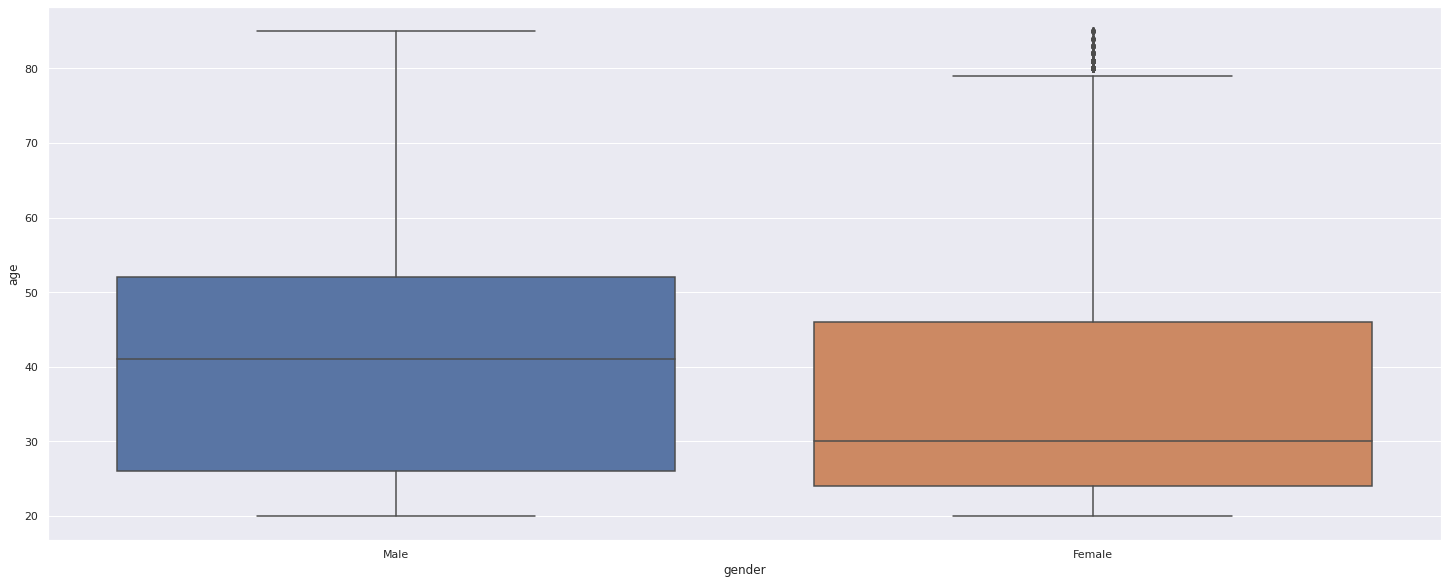

In [67]:
ax = sns.boxplot(x='gender', y='age', data=df2)


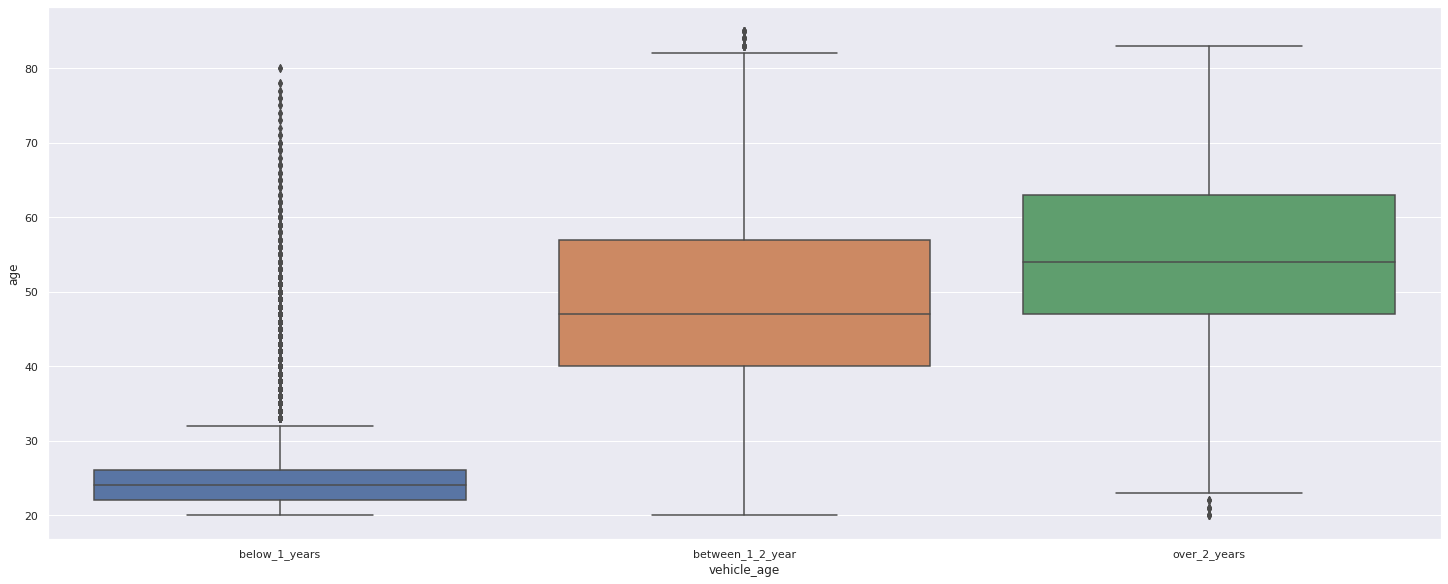

In [68]:
ax = sns.boxplot(x='vehicle_age', y='age', data=df2)

# 6.0 Feature Engineering

In [69]:
df3 = df2.copy()

In [70]:
# Criação de faixas etárias
df3['age_group'] = df3['age'].apply(lambda x: 'below20' if x < 20 else
                                              '20a29' if 20 <= x <= 29 else
                                              '30a49' if 30 <= x <= 49 else
                                              '50a69' if 50 <= x <= 69 else
                                              'above70')

In [71]:
df3.sample(5)

,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response,age_group
99846,34071,Male,38,8,124,1,between_1_2_year,0,1,48972.0,290,0,30a49
33360,266337,Female,21,8,154,1,between_1_2_year,1,0,32554.0,246,0,20a29
182982,319536,Male,22,9,160,1,below_1_years,0,1,26023.0,56,0,20a29
105885,82667,Male,20,41,156,1,below_1_years,1,0,2630.0,222,1,20a29
65699,143980,Male,23,29,152,1,below_1_years,0,1,31437.0,91,0,20a29


# 7.0 Data Filtering

In [72]:
df4 = df3.copy()

In [73]:
#df4 = df4.drop('policy_sales_channel', axis=1)
#df4.columns

In [74]:
df4.sample(5)

,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response,age_group
308218,176430,Female,23,39,152,1,below_1_years,0,1,28967.0,297,0,20a29
19980,159486,Female,23,29,163,1,below_1_years,1,0,27724.0,49,0,20a29
107063,92534,Male,28,38,152,1,below_1_years,0,1,28380.0,129,0,20a29
371030,300196,Male,23,46,152,1,below_1_years,0,1,26212.0,216,0,20a29
62573,118624,Female,24,6,152,1,below_1_years,0,1,16059.0,90,0,20a29


# 8.0 EDA

In [75]:
df5 = df4.copy()

## 8.1 Análise Univariada

In [81]:
# gender


<AxesSubplot:xlabel='response', ylabel='age'>

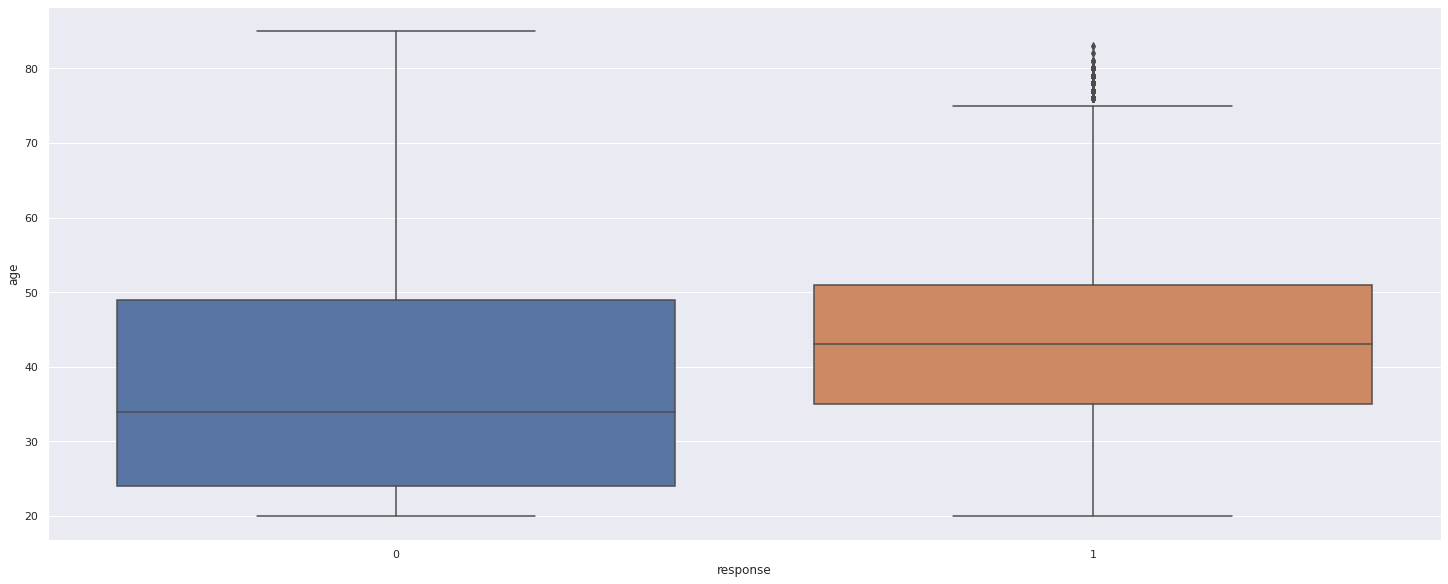

In [84]:
# age
sns.boxplot(x='response', y='age', data=df5)

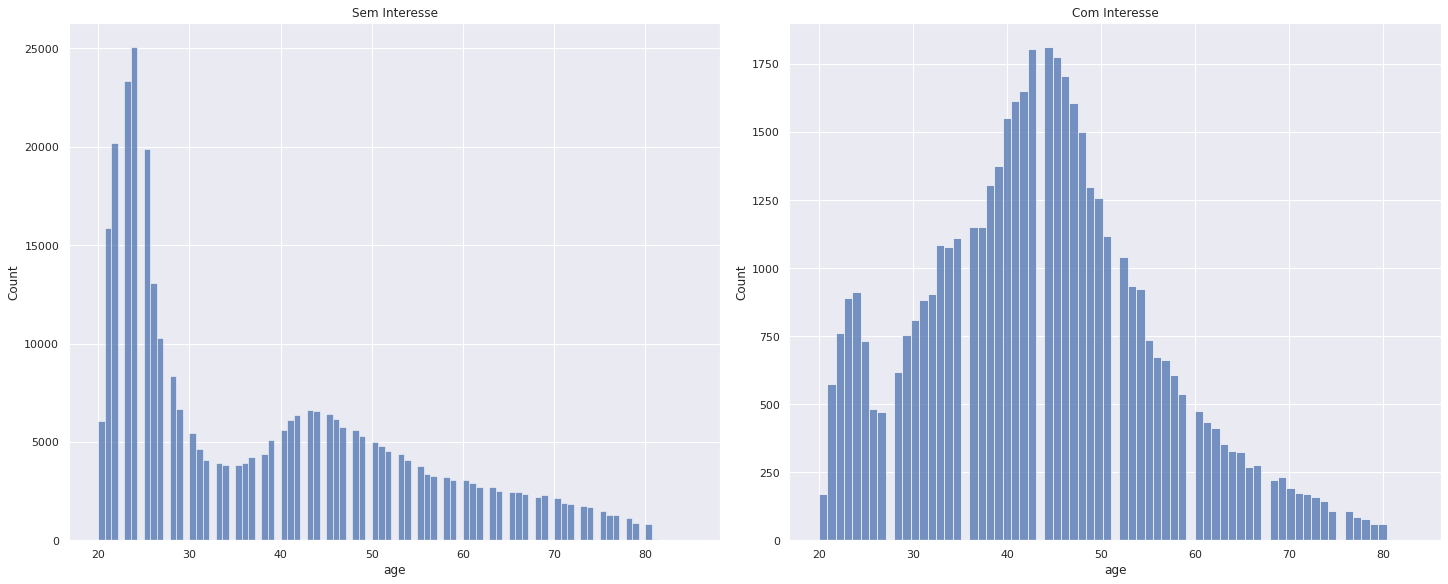

In [94]:
plt.subplot(1,2,1)
aux00 = df5.loc[df5['response'] == 0, 'age' ]
ax = sns.histplot(aux00).set(title = 'Sem Interesse')

plt.subplot(1,2,2)
aux01 = df5.loc[df5['response'] == 1, 'age' ]
sns.histplot(aux01).set(title = 'Com Interesse');

<AxesSubplot:xlabel='region_code', ylabel='id'>

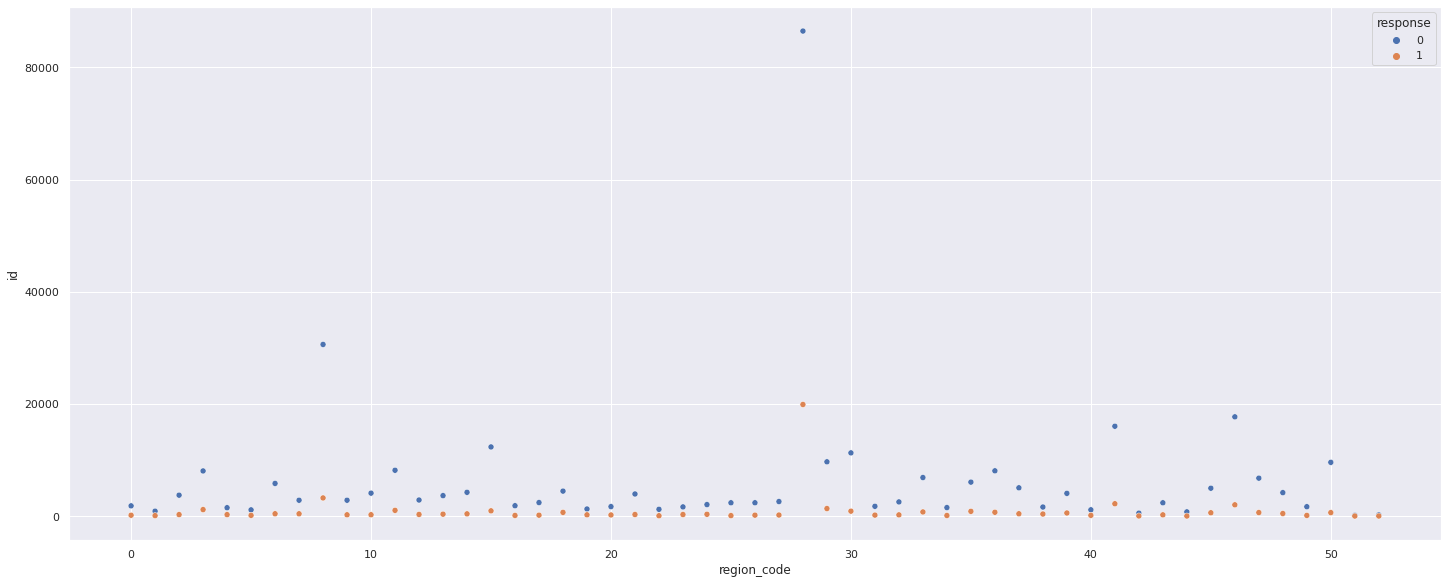

In [112]:
# region_code

aux = df5[['id', 'region_code', 'response']].groupby(['region_code', 'response']).count().reset_index()
sns.scatterplot(x='region_code', y='id', hue='response', data=aux );

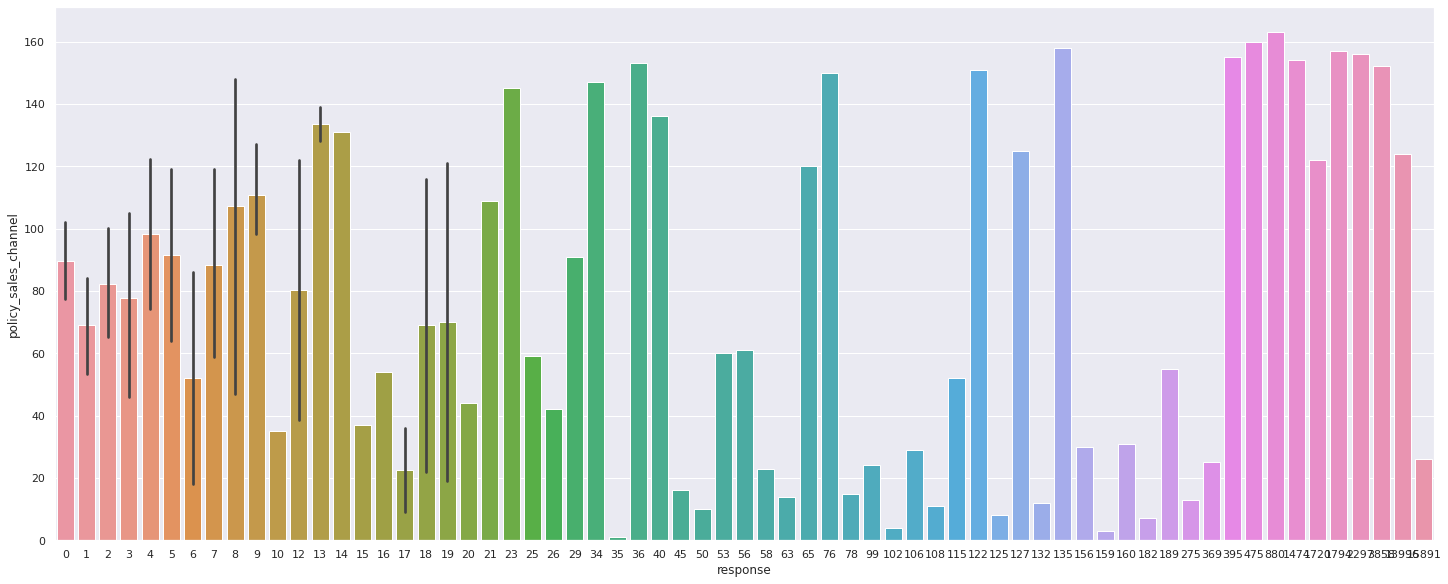

In [134]:
# policy_sales_channel

aux = df5[['policy_sales_channel', 'response']].groupby('policy_sales_channel').sum().reset_index()
sns.barplot(x='response', y='policy_sales_channel', data=aux);

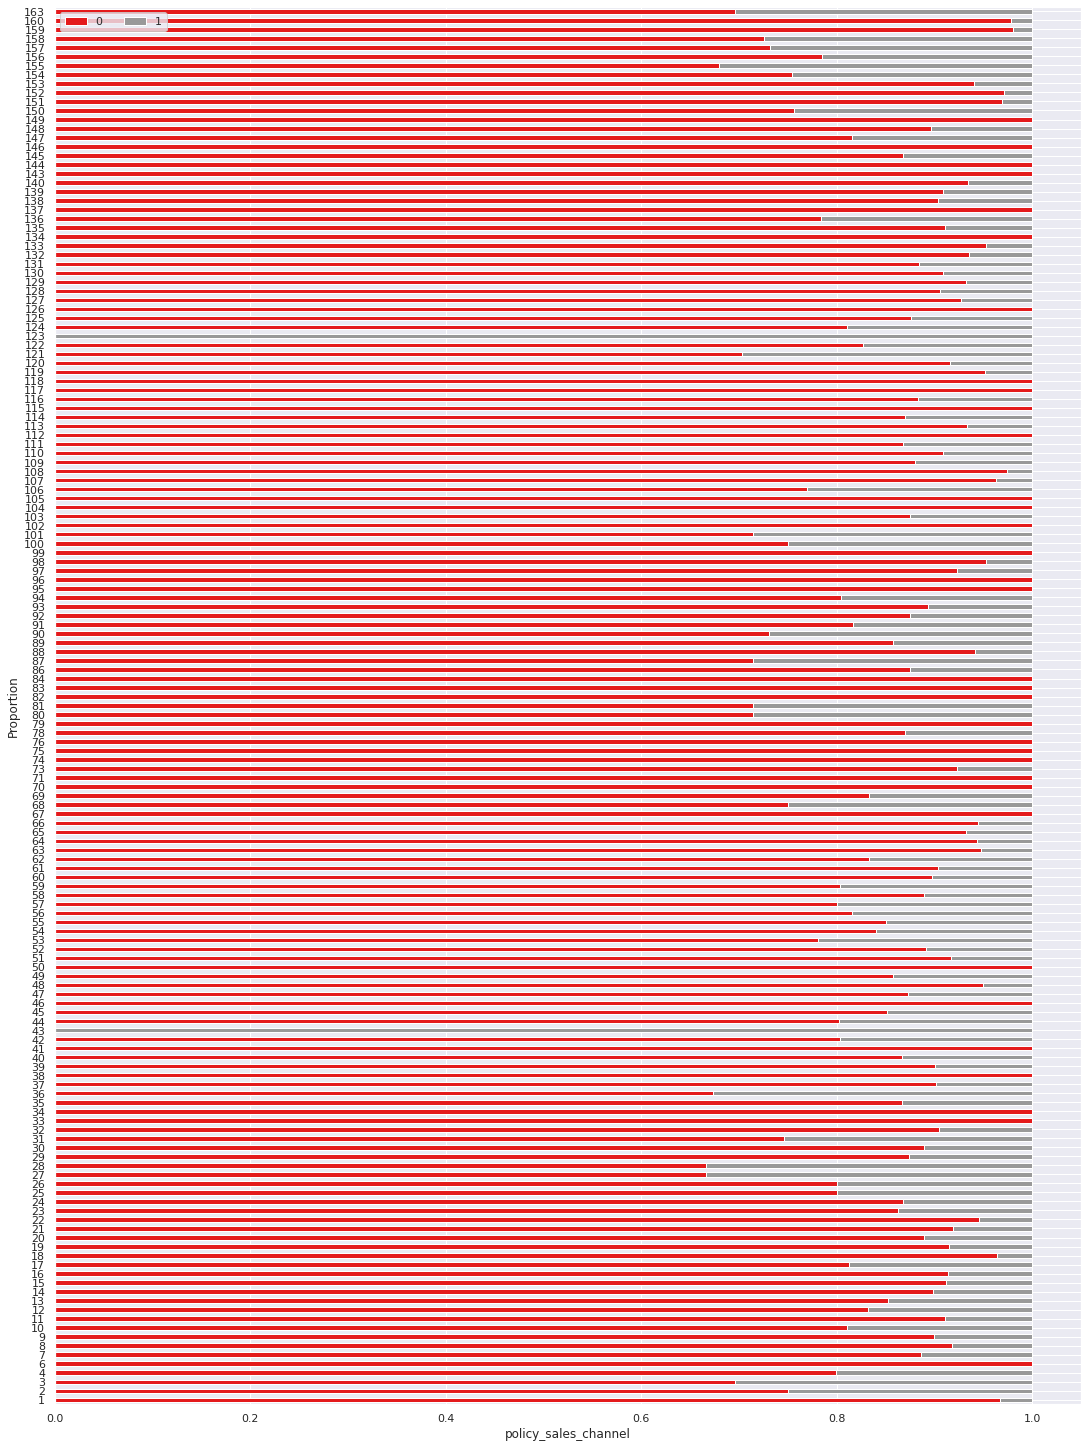

In [175]:
# policy_sales_channel - Stacked
#https://towardsdatascience.com/100-stacked-charts-in-python-6ca3e1962d2b

aux = df5[['policy_sales_channel', 'response']]

cross_tab_prop = pd.crosstab(index=aux['policy_sales_channel'],
                             columns=aux['response'],
                             normalize="index")

cross_tab_prop.plot(kind='barh', 
                    stacked=True, 
                    colormap='Set1', 
                    figsize=(15, 20))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("policy_sales_channel")
plt.ylabel("Proportion")
plt.show()



In [109]:
# driving_license

aux = df5[['driving_license', 'response']].groupby('response').sum().reset_index()
aux['driving_license_perc'] = round((aux['driving_license'] / aux['driving_license'].sum()) * 100, 2)
aux

,response,driving_license,driving_license_perc
0,0,333628,87.73
1,1,46669,12.27


In [132]:
# vehicle_age

df5[['vehicle_age', 'response']].value_counts(normalize=True, sort=False) .reset_index()

,vehicle_age,response,0
0,below_1_years,0,0.413488
1,below_1_years,1,0.018897
2,between_1_2_year,0,0.434285
3,between_1_2_year,1,0.091328
4,over_2_years,0,0.029663
5,over_2_years,1,0.012338


In [ ]:
# vehicle_damage

In [120]:
# previously_insured

pd.crosstab(df5['previously_insured'], df5['response']).apply(lambda x: x / x.sum(), axis=1)

response,0,1
previously_insured,,
0,0.774546,0.225454
1,0.999095,0.000905


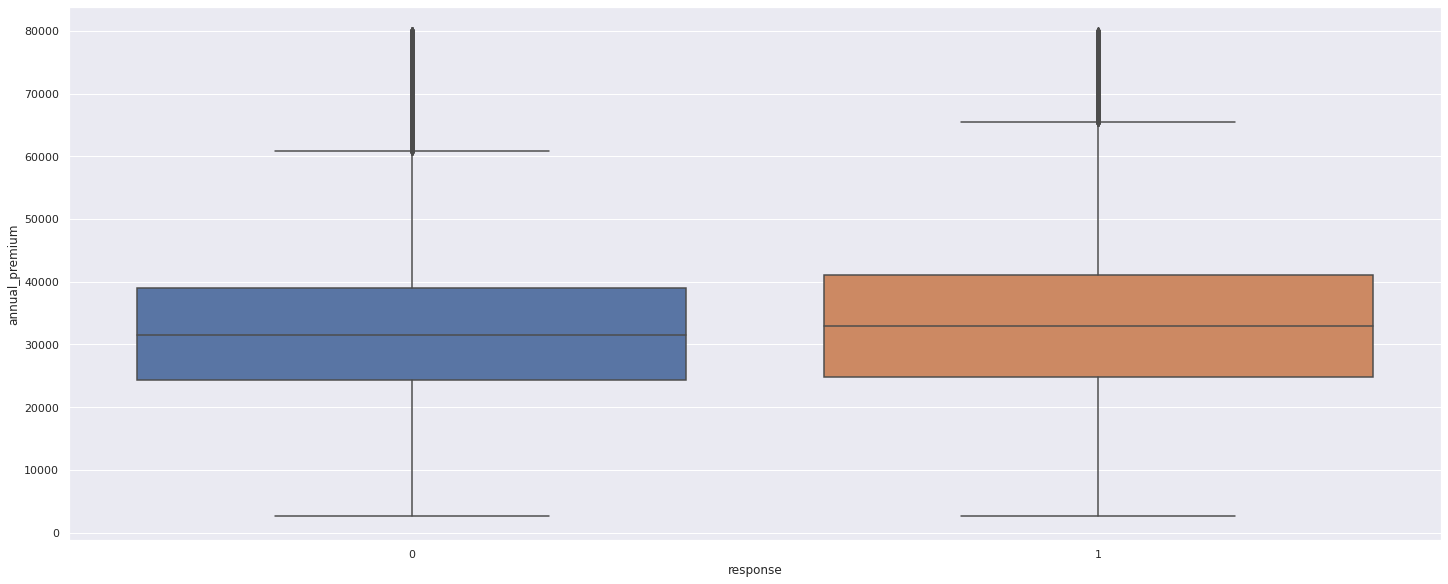

In [97]:
# annual_premium
aux = df5[df5['annual_premium'] < 80000]
sns.boxplot(x='response', y='annual_premium', data=aux);

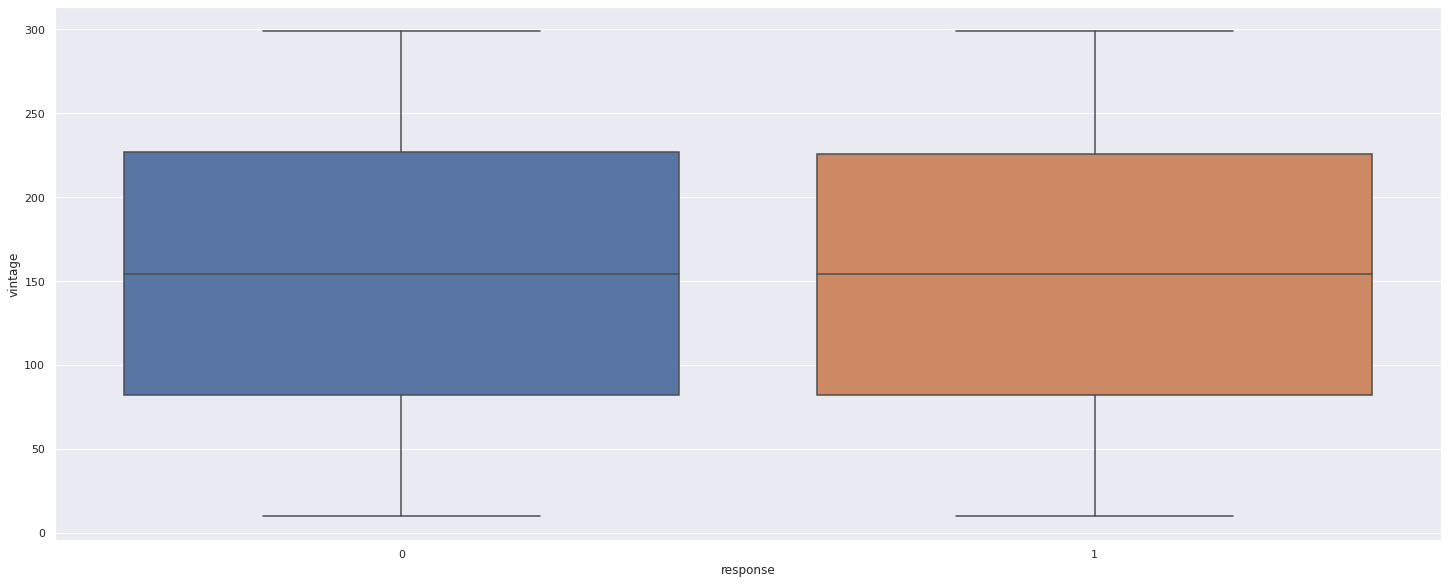

In [176]:
# vintage

sns.boxplot(x='response', y='vintage', data=df5);

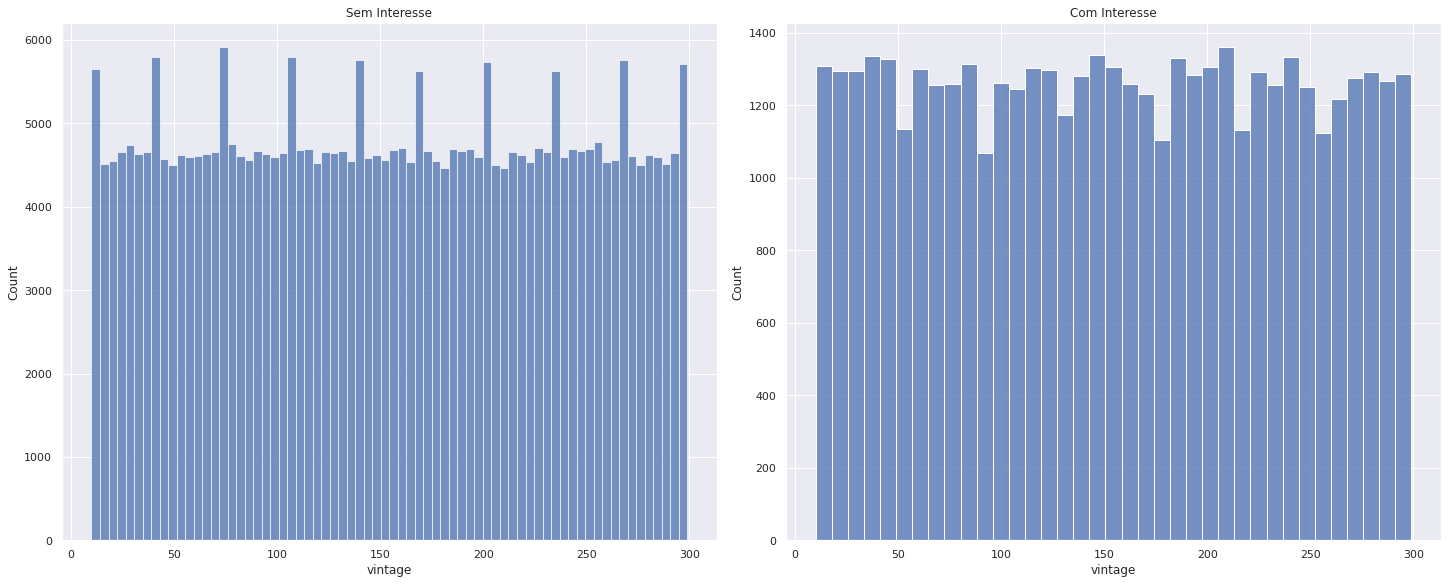

In [177]:
plt.subplot(1,2,1)
aux00 = df5.loc[df5['response'] == 0, 'vintage' ]
ax = sns.histplot(aux00).set(title = 'Sem Interesse')

plt.subplot(1,2,2)
aux01 = df5.loc[df5['response'] == 1, 'vintage' ]
sns.histplot(aux01).set(title = 'Com Interesse');

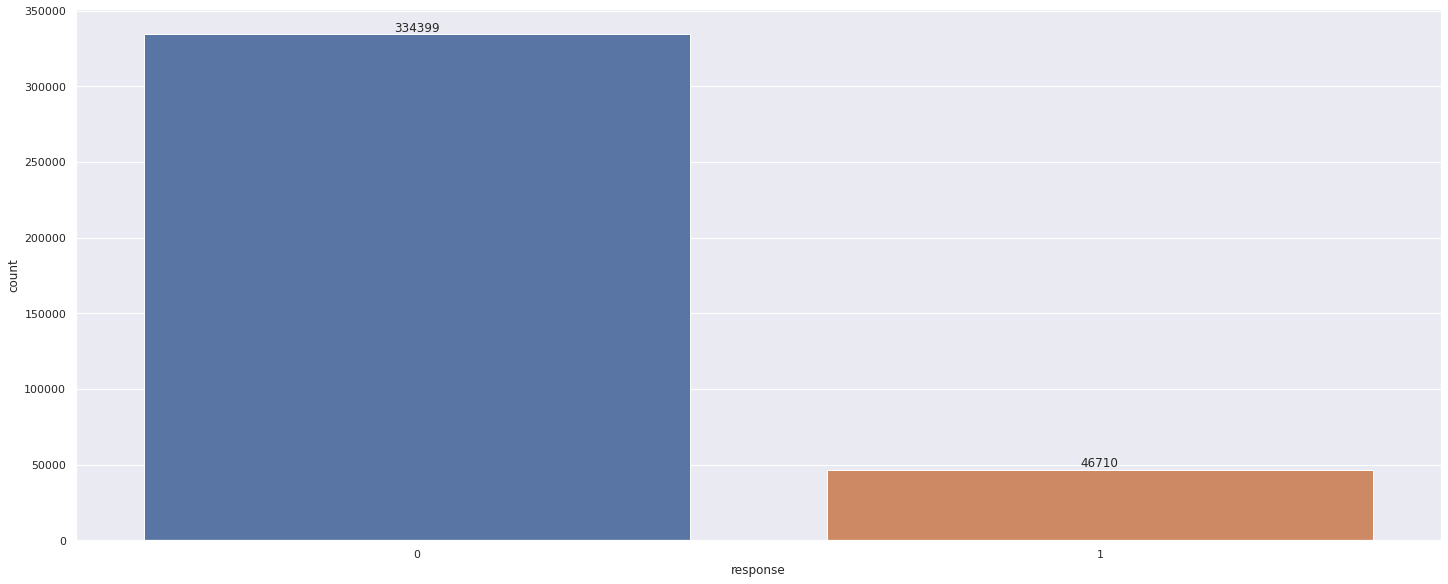

In [76]:
ax = sns.countplot(df5['response'])
ax.bar_label(ax.containers[0]);

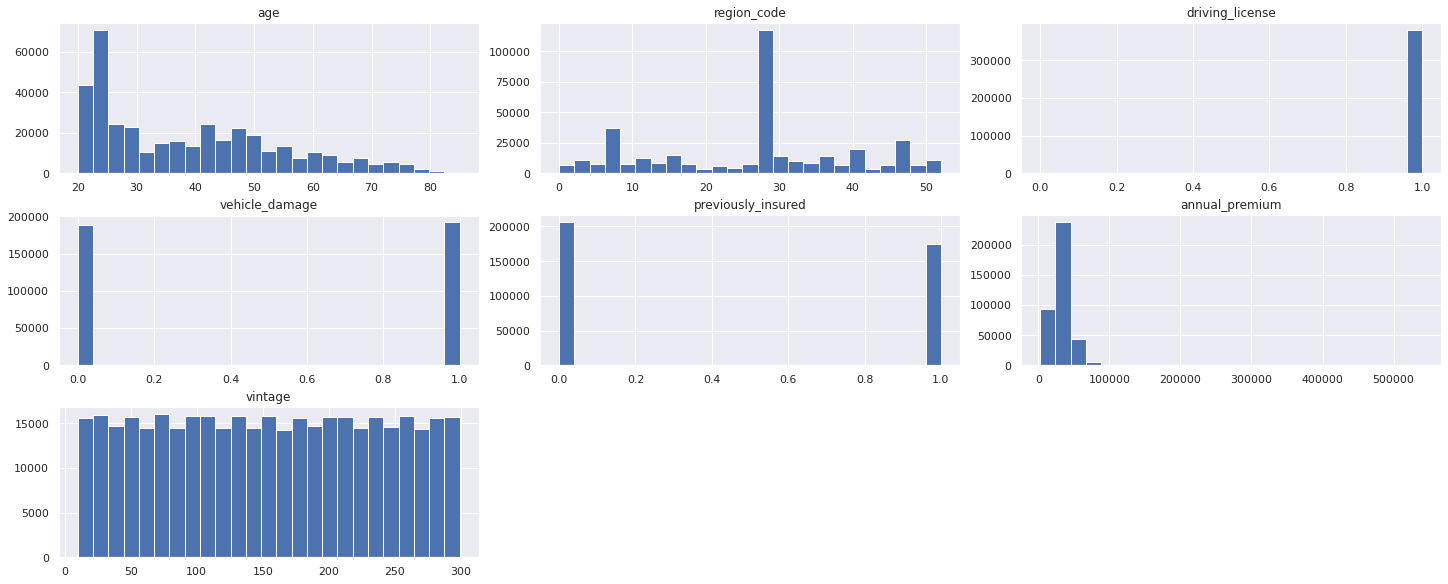

In [77]:
cols_drop = ['id', 'policy_sales_channel', 'response']
num_atrib = num_atrib.drop(cols_drop, axis=1)
num_atrib.hist(bins=25);

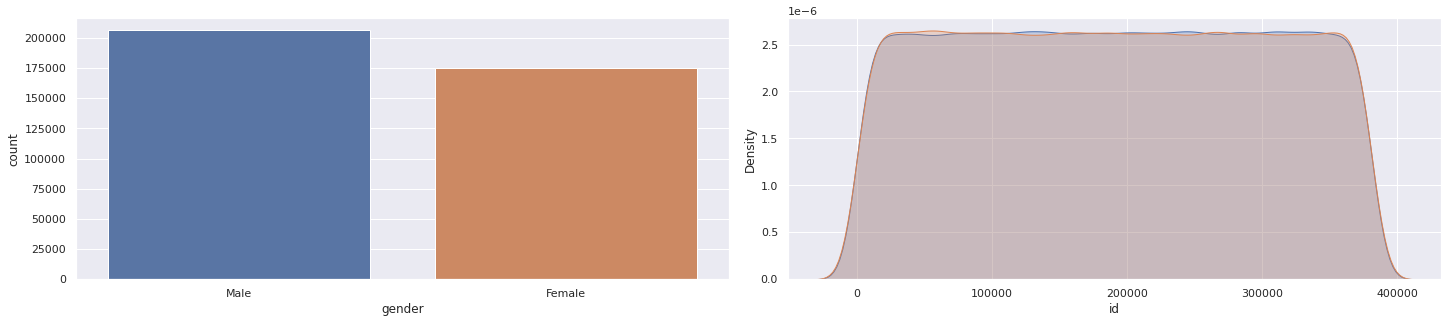

In [78]:
plt.subplot(2,2,1)
sns.countplot(df5['gender'])

plt.subplot(2,2,2)
sns.kdeplot(df5[df5['gender'] == 'Male']['id'], label='Male', shade=True )
sns.kdeplot(df5[df5['gender'] == 'Female']['id'], label='Female', shade=True );


## 8.2 Análise Bivariada

# 9.0 Data Preparation

In [178]:
df6 = df5.copy()

## 9.1 Standardization

## 9.2 Rescaling

## 9.3 Encoder

# 10.0 Feature Selection